In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def de_mean_numpy_matrix(np_matrix):
    return (np_matrix - np_matrix.mean(axis = 0))

In [159]:
class PCA:
    
    def __init__(self, step_size = .01,  max_no_improve_iter = 100, max_iter = 1000):
        
        self.step_size = step_size
        self.max_no_improve_iter = max_no_improve_iter
        self.max_iter = max_iter
        self.history = []   
        self.components = []
    def value_function(self,x,theta):
        theta = theta/np.linalg.norm(theta)
        return np.dot(x,theta)**2
    
    def  gradient_function(self,x,theta):
        theta = theta/np.linalg.norm(theta)
        projection_length = np.dot(x, theta)
        return 2*projection_length*x
    
    def optimize(self,x):
        '''
        Given an dataset of x and y numpy arrays performs stoachastic gradient descent. Begins
        with random theta.
        '''
        no_improve_counter = 0
        self.theta = np.repeat(1.0,x.shape[1])
        theta_optimal = self.theta
        max_value = -np.Inf
        stepsize = self.step_size
        max_iter = 0
        while no_improve_counter < self.max_no_improve_iter and max_iter < self.max_iter:

            cur_fun_value = np.sum(self.value_function(x,self.theta))
                        
            if cur_fun_value > max_value:
                max_value = cur_fun_value
                theta_optimal = self.theta
                no_improve_counter = 0
            else:
                no_improve_counter += 1
                stepsize *= .9
                
            np.random.shuffle(x)
            self.history.append(self.theta)
 
            for index in range(x.shape[0]):
            
                gradient = self.gradient_function(x[index,:],self.theta)
                self.theta = self.theta + stepsize*gradient
                
            max_iter += 1
            
        self.theta = theta_optimal
        return(self.theta)
   
    def scale_output(self):
        self.theta = self.theta/np.linalg.norm(self.theta) 
        #self.history = [row/np.linalg.norm(row) for row in self.history]
        return self.theta
    
    def reset_history(self):
        self.history = []
    
    def project(self, x):
        theta_stack = np.repeat(self.theta.reshape(1,len(self.theta)), len(x),axis = 0)
        projection_length = np.dot(x,self.theta)
        
        return(np.dot(np.diag(projection_length),theta_stack))
    
    def remove_component(self, x):
        self.scale_output()
        return x - self.project(x)
    
    def get_all_components(self,X):
        while len(self.components) < X.shape[1]:
            self.optimize(X)
            self.components.append(self.scale_output())
            X = self.remove_component(X)
            self.reset_history()
        return(self.components)
    
    def return_components(self,x):
        return np.hstack(np.dot(X, weights).reshape(len(X),1) for weights in components)

In [138]:
x1 = np.linspace(0,49,50)
x2 = x1*.5 + np.random.normal(5,5,50)
X = np.stack((x1,x2),axis = 1)
X = de_mean_numpy_matrix(X)

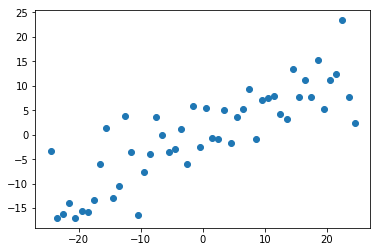

In [139]:
plt.scatter(X[:,0],X[:,1])

In [160]:
testPCA = PCA(max_iter=1000,step_size=0.01)

In [161]:
testPCA.optimize(X)
print(testPCA.scale_output())

[0.85433809 0.51971765]


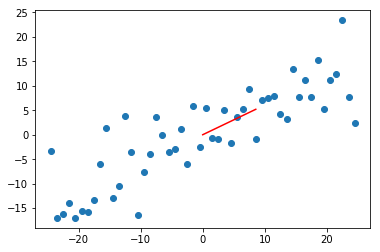

In [162]:
components = testPCA.theta
plt.scatter(X[:,0],X[:,1])
plt.plot([0,components[0]*10],[0, components[1]*10], c = 'red')

In [163]:
components = testPCA.get_all_components(X)

In [164]:
components

[array([0.85434452, 0.51970708]), array([-0.51964638,  0.85438144])]

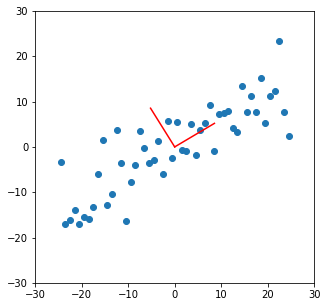

In [165]:
fig, ax = plt.subplots(figsize = (5,5))
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
plt.scatter(X[:,0],X[:,1])
for component in components:
    ax.plot([0,component[0]*10], [0, component[1]*10],c = 'red')

In [166]:
pca_data = testPCA.return_components(X)

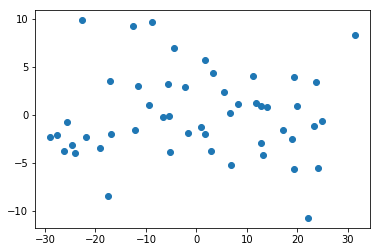

In [168]:
plt.scatter(pca_data[:,0],pca_data[:,1])

In [169]:
from sklearn.decomposition import PCA as sklearn_PCA

In [170]:
sklearn_pca = sklearn_PCA()

In [171]:
sklearn_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [174]:
sklearn_pca.components_

array([[ 0.85434035,  0.51971394],
       [ 0.51971394, -0.85434035]])

In [177]:
pca_data[:10,:]

array([[ 11.84708628,   1.19669459],
       [  6.58503431,   0.24269653],
       [  1.71113013,  -1.99736008],
       [ 18.94926664,  -2.52083974],
       [  3.24708688,   4.37602421],
       [-24.03982088,  -3.92370412],
       [ 31.37618289,   8.28780003],
       [  5.56870554,   2.42020691],
       [-16.98214625,  -1.94192195],
       [-11.64102981,   2.99037715]])

In [175]:
sklearn_pca.transform(X)[:10,:]

array([[ 11.84709588,  -1.19575779],
       [  6.58503625,  -0.24217581],
       [  1.7111141 ,   1.99749539],
       [ 18.94924639,   2.52233816],
       [  3.24712199,  -4.37576746],
       [-24.03985235,   3.92180318],
       [ 31.37624938,  -8.28531898],
       [  5.56872496,  -2.41976657],
       [-16.98216182,   1.94057909],
       [-11.6410058 ,  -2.99129767]])